In [22]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum, to_date, year
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a SparkSession
spark = SparkSession.builder.appName("CrudeOilAnalysis").getOrCreate()

print("SparkSession created successfully.")

SparkSession created successfully.


In [23]:
# Load the dataset from the CSV file
try:
    df = spark.read.csv("file:///C:/Users/manvitha/Downloads/BDA Project/Crude oil.csv", header=True, inferSchema=True)
    print("Dataset loaded successfully.")
    df.show(5)  # Show the first 5 rows
except Exception as e:
    print(f"Error loading the CSV file: {e}")
    print("Please ensure 'Crude oil.csv' is in the correct directory.")


Dataset loaded successfully.
+---------+----+--------------------+----------------------------+
|    Month|Year|       OIL COMPANIES|Quantity (000 Metric Tonnes)|
+---------+----+--------------------+----------------------------+
|September|2022|          CPCL-TOTAL|                      961.61|
|September|2022|  BPCL-KOCHI, KERALA|                     1155.88|
|September|2022|MRPL-MANGALORE,KA...|                     1329.62|
|September|2022|          ONGC TOTAL|                     1336.44|
|September|2022|HPCL-VISAKH,ANDHR...|                      814.04|
+---------+----+--------------------+----------------------------+
only showing top 5 rows


In [24]:
# Rename the column 'Quantity (000 Metric Tonnes)' to 'Quantity' for easier access
df = df.withColumnRenamed("Quantity (000 Metric Tonnes)", "Quantity")

# Display the schema to verify column names and data types
print("DataFrame Schema:")
df.printSchema()

DataFrame Schema:
root
 |-- Month: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- OIL COMPANIES: string (nullable = true)
 |-- Quantity: double (nullable = true)



In [25]:
# Group by 'OIL COMPANIES' and calculate the sum of 'Quantity'
company_wise_total = df.groupBy("OIL COMPANIES").agg(_sum("Quantity").alias("TotalQuantity"))

# Show the results, ordered by the total quantity in descending order
print("Total Production by Oil Company:")
company_wise_total.orderBy(col("TotalQuantity").desc()).show(10)

Total Production by Oil Company:
+--------------------+------------------+
|       OIL COMPANIES|     TotalQuantity|
+--------------------+------------------+
|         GRAND TOTAL|         980255.12|
|          IOCL TOTAL|         275731.83|
|           RIL TOTAL|248957.25999999998|
|          BPCL-TOTAL|150270.15000000002|
|RIL,JAMNAGAR,GUJARAT|         137679.56|
|          HPCL-TOTAL|         120293.76|
|RIL-(SEZ), JAMNAG...|111277.70000000001|
| NEL-VADINAR,GUJARAT|          76245.88|
|  BPCL-KOCHI, KERALA|           62011.0|
|          ONGC TOTAL|          60291.34|
+--------------------+------------------+
only showing top 10 rows


In [26]:
# Group by 'Year' and calculate the sum of 'Quantity'
yearly_total = df.groupBy("Year").agg(_sum("Quantity").alias("TotalQuantity")).orderBy("Year")

# Show the results
print("Total Production by Year:")
yearly_total.show()

Total Production by Year:
+----+------------------+
|Year|     TotalQuantity|
+----+------------------+
|2020|          468578.0|
|2021|          694210.0|
|2022| 737440.7899999993|
|2023| 761508.1500000008|
|2024|194552.51999999996|
+----+------------------+



In [27]:
# Convert the aggregated Spark DataFrames to Pandas DataFrames for plotting
company_wise_total_pd = company_wise_total.toPandas()
yearly_total_pd = yearly_total.toPandas()

print("DataFrames converted to Pandas for visualization.")

DataFrames converted to Pandas for visualization.


C:\Users\manvitha\AppData\Local\Temp\ipykernel_22260\3985745292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalQuantity", y="OIL COMPANIES", data=top_10_companies, palette="viridis")


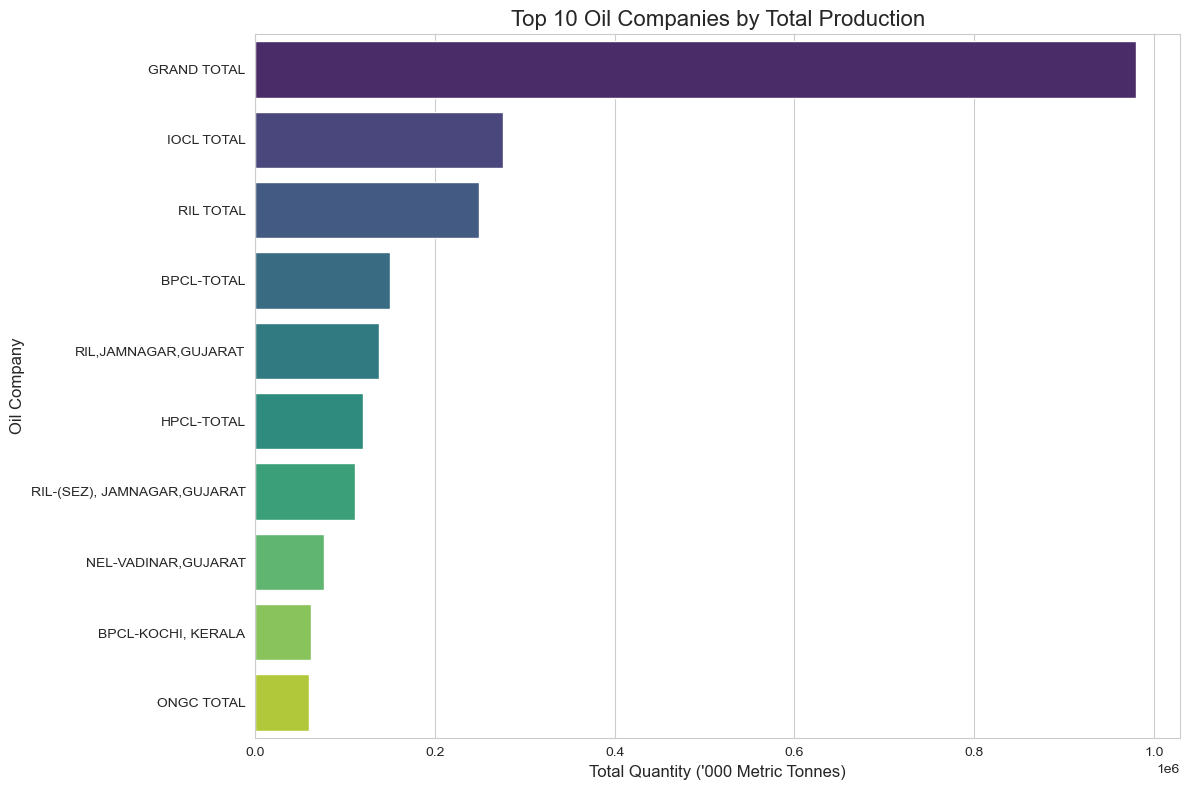

In [28]:
# Set plot style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
top_10_companies = company_wise_total_pd.sort_values(by="TotalQuantity", ascending=False).head(10)
sns.barplot(x="TotalQuantity", y="OIL COMPANIES", data=top_10_companies, palette="viridis")

# Add titles and labels
plt.title("Top 10 Oil Companies by Total Production", fontsize=16)
plt.xlabel("Total Quantity ('000 Metric Tonnes)", fontsize=12)
plt.ylabel("Oil Company", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

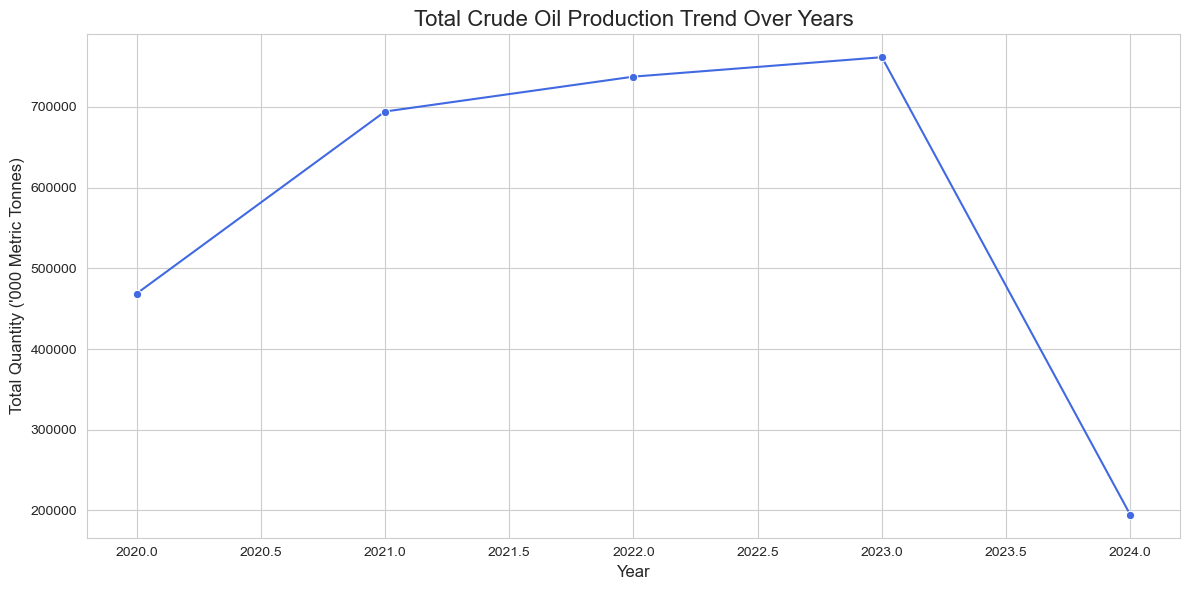

In [29]:
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="TotalQuantity", data=yearly_total_pd, marker='o', color='royalblue')

# Add titles and labels
plt.title("Total Crude Oil Production Trend Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Quantity ('000 Metric Tonnes)", fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Crude oil.csv")

# Rename the quantity column for easier use
df.rename(columns={"Quantity (000 Metric Tonnes)": "Quantity"}, inplace=True)

# Remove rows where the company is 'GRAND TOTAL' or other total summaries
df = df[~df['OIL COMPANIES'].str.contains("TOTAL", na=False)]

# Create a proper 'Date' column and extract the month name
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df['MonthName'] = df['Date'].dt.strftime('%B')

C:\Users\manvitha\AppData\Local\Temp\ipykernel_22260\3886023254.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))


C:\Users\manvitha\AppData\Local\Temp\ipykernel_22260\4278461320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MonthName', y='Quantity', data=monthly_production, palette='coolwarm')


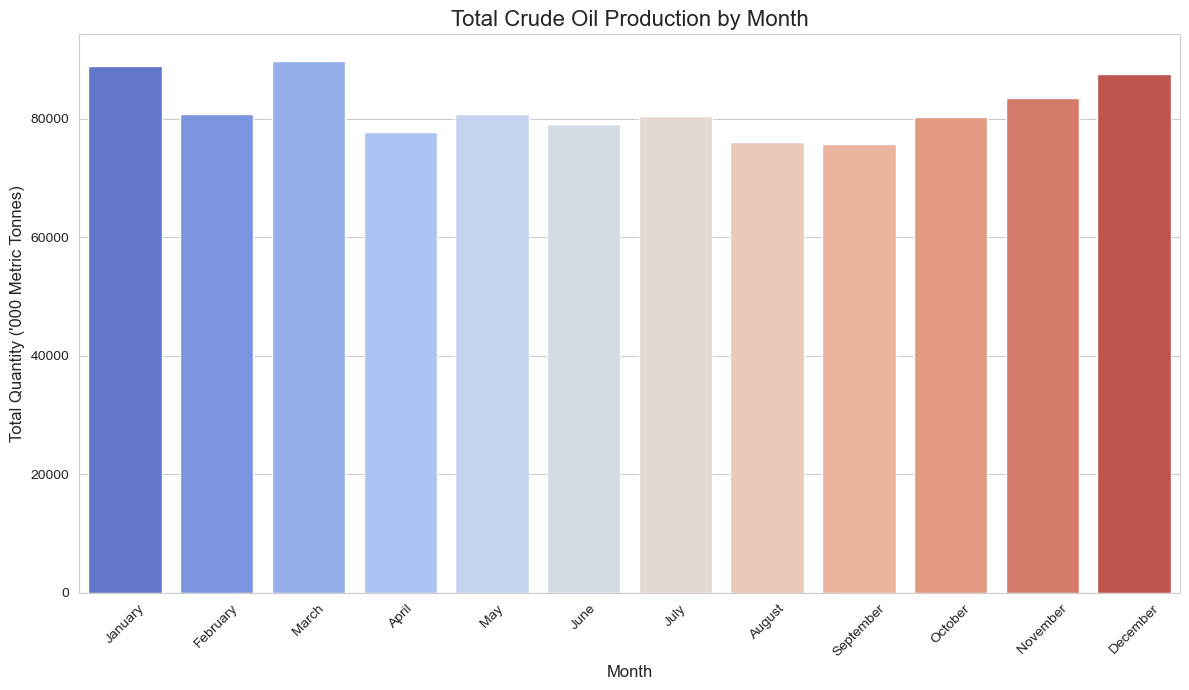

In [31]:
# Group by month and sum the quantity
monthly_production = df.groupby('MonthName')['Quantity'].sum().reset_index()

# Define the correct order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_production['MonthName'] = pd.Categorical(monthly_production['MonthName'], categories=month_order, ordered=True)
monthly_production = monthly_production.sort_values('MonthName')

# Create the plot
plt.figure(figsize=(12, 7))
sns.barplot(x='MonthName', y='Quantity', data=monthly_production, palette='coolwarm')
plt.title('Total Crude Oil Production by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel("Total Quantity ('000 Metric Tonnes)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

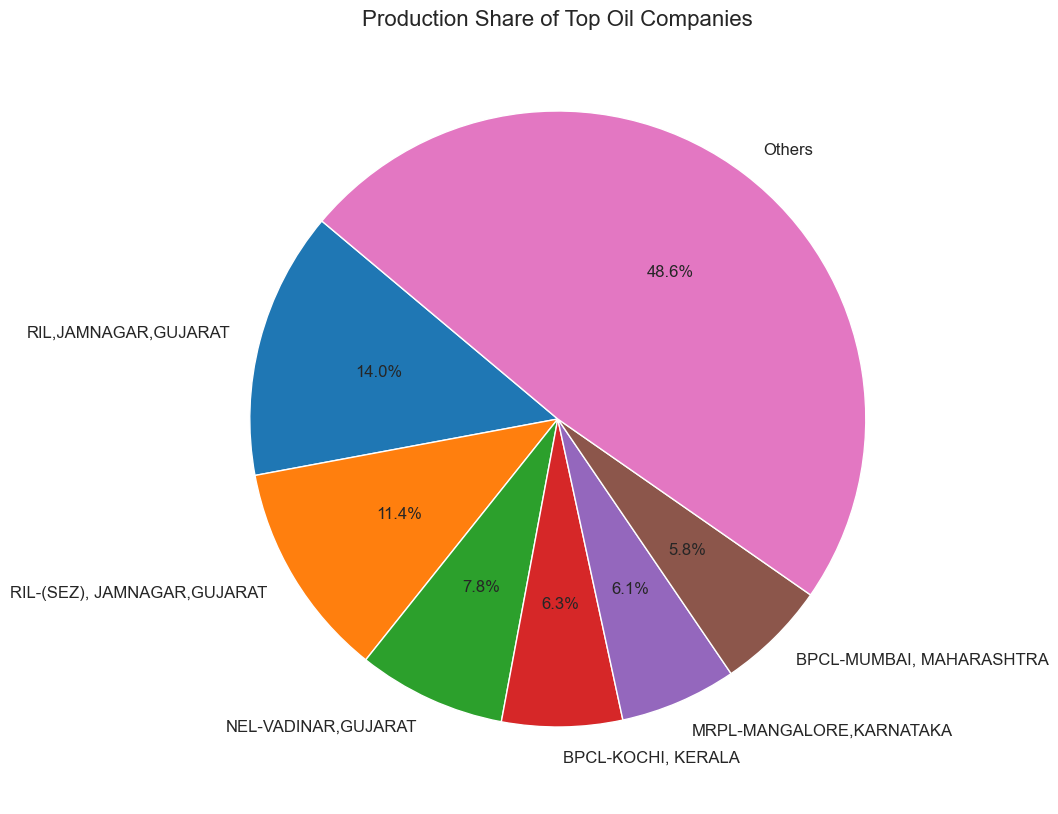

In [32]:
# Group by company to get total production
company_total = df.groupby('OIL COMPANIES')['Quantity'].sum().sort_values(ascending=False)

# Get the top 6 companies and sum the rest
top_companies = company_total.head(6)
other_quantity = company_total.iloc[6:].sum()
top_companies['Others'] = other_quantity

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%', startangle=140, 
        wedgeprops=dict(edgecolor='w'), textprops={'fontsize': 12})
plt.title('Production Share of Top Oil Companies', fontsize=16)
plt.ylabel('') # Hide the y-label
plt.show()

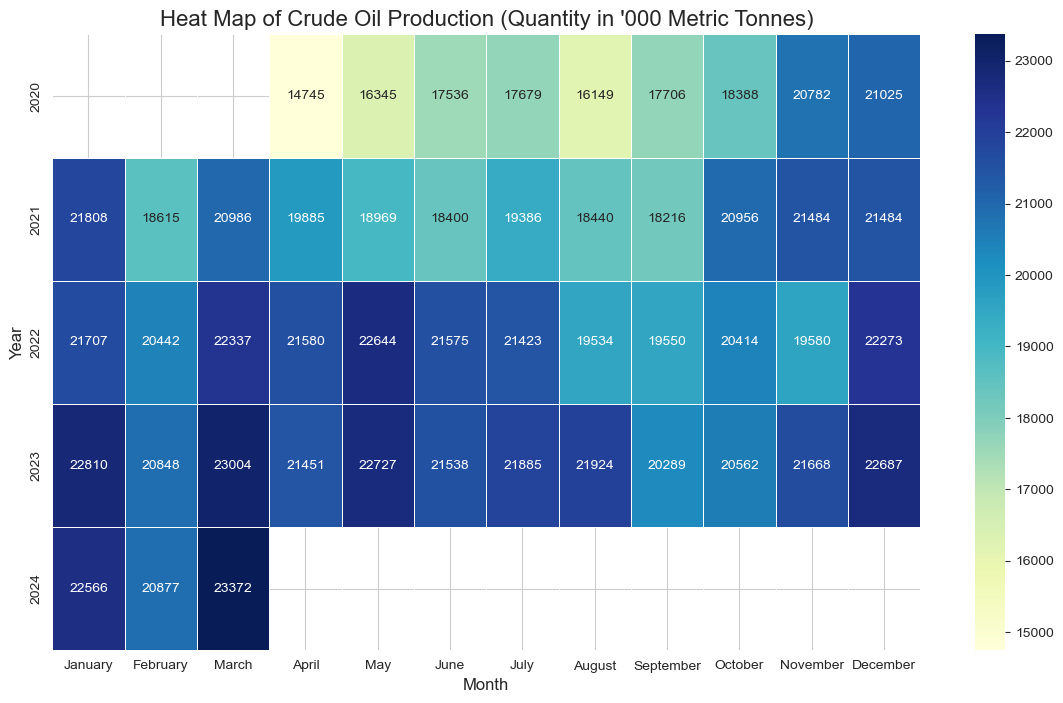

In [33]:
# Create a pivot table: Year vs. Month with Quantity as values
pivot_table = df.pivot_table(values='Quantity', index='Year', columns='MonthName', aggfunc='sum')

# Reorder columns to be in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heat Map of Crude Oil Production (Quantity in \'000 Metric Tonnes)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()

C:\Users\manvitha\AppData\Local\Temp\ipykernel_22260\3349810888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='OIL COMPANIES', y='Quantity', data=df_top5, palette='muted')


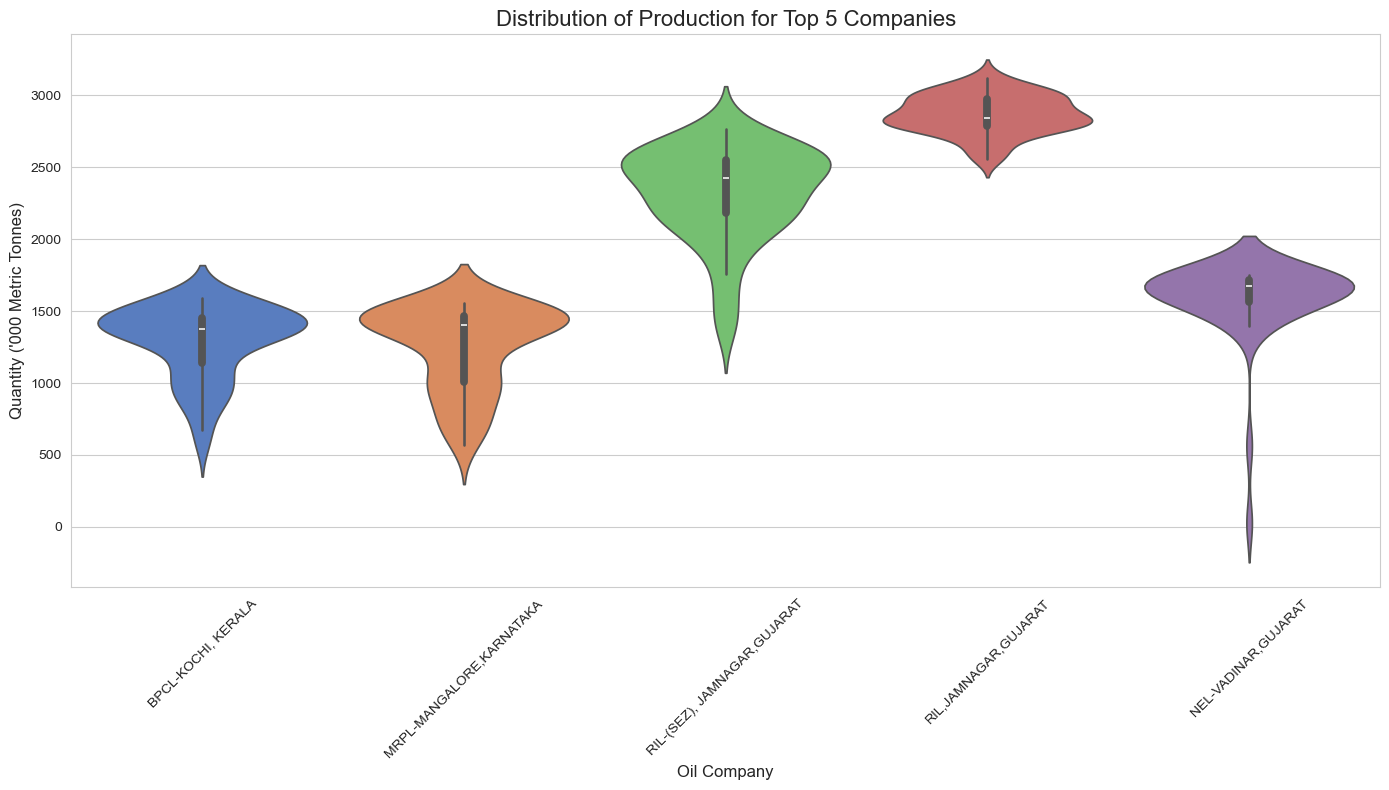

In [34]:
# Get the names of the top 5 companies
top_5_company_names = df.groupby('OIL COMPANIES')['Quantity'].sum().nlargest(5).index

# Filter the DataFrame to only include these top 5 companies
df_top5 = df[df['OIL COMPANIES'].isin(top_5_company_names)]

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='OIL COMPANIES', y='Quantity', data=df_top5, palette='muted')
plt.title('Distribution of Production for Top 5 Companies', fontsize=16)
plt.xlabel('Oil Company', fontsize=12)
plt.ylabel("Quantity ('000 Metric Tonnes)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()